# EDA 2018 - Kickstarter

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

## Import du dataset

In [2]:
warnings.filterwarnings('ignore') #Les messages d'avertissements ne seront pas affichés grâce à cette ligne

In [3]:
df = pd.read_csv('dataset.csv', index_col=0) #chargement du dataset, sans la colonne index

## Analyse globale du dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 31.8+ MB


Colonne | Description
------- | -------
**ID** | internal kickstarter id
**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
**category** | category
**main_category** | category of campaign
**currency** | currency used to support
**deadline** | deadline for crowdfunding
**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
**launched** | date launched
**pledged** | pledged amount in the project currency
**state** | current condition the project is in
**backers** | number of backers
**country** | country pledged from
**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)
**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)
**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)

On peut noter que la plupart des données présentes dans le dataset sont de type object : Il sera nécessaire de faire une analyse sur et entre ces données de ce type là pour mettre en évidence l'existence d'une corrélation ou non.


In [5]:
#Premières lignes du dataset pour avoir une idée du genre des données

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Analyse des données manquantes et dupliquées 

### Données manquantes

In [6]:
df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Il manque 3797 valeurs à usd_pledged : Cette colonne ne doit pas être utilisé pour faire des analyses univariée ou multivariée au vue de la quantité de données manquantes. Ces données ne peuvent être remplacée puisqu'il s'agit d'un montant en dollar americain.

In [7]:
df.category.count()

#Pour connaître le nombre de lignes dans le dataset, on prend 'category' comme référence puisqu'il ne manque aucune donnée dans cette colonne

378661

### Données dupliquées

In [8]:
df[df.duplicated(keep=False)].count()

name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Aucune valeurs dupliquées dans l'ensemble du dataset : Dans le cas contraire il aurait fallu drop les valeurs dupliquées.

## Analyse des outliers

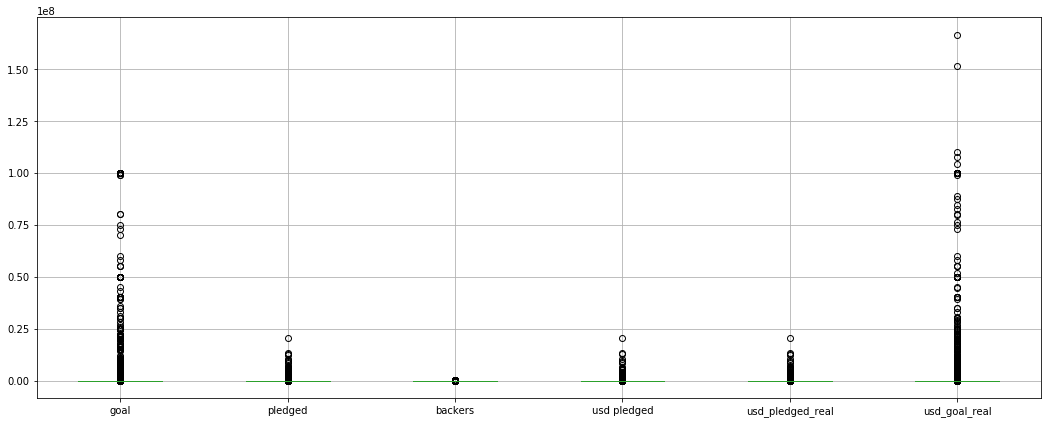

In [9]:
plt.subplots(figsize=(18,7))
df.boxplot()

Les outliers dans goal et usd_goal_real sont les plus remarquables mais ne semble pas être des valeurs abérrantes :
- Le montant du goal dépend uniquement du projet, donc certains peuvent être démesurés sans être abérrants
- Dans la même logique, usd_goal_real dépend aussi du projet et les données de pledged dépendent, elles, de la générosité des backers

## Analyses univariées

Text(0.5, 1.0, 'Proportion des projets en fonction de leurs états')

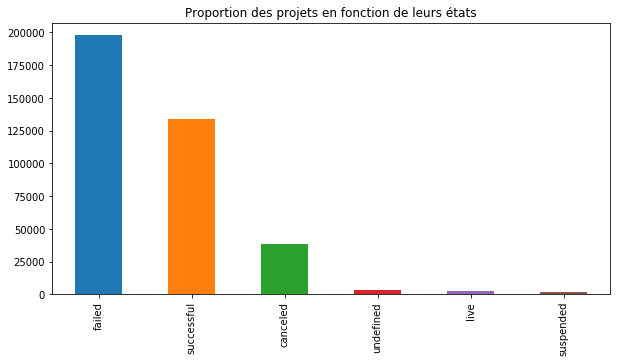

In [10]:
plt.figure(figsize=(10,5))
df.state.value_counts().plot.bar()
plt.title("Proportion des projets en fonction de leurs états")

On remarque que la grande majorité des projets échouent (failed) mais il existe une proportion malgré tout conséquente de projet qui aboutissent (successful). C'est vis à vis de cette colonne que l'analyse multivariée va être intéressante, puisqu'elle permettra de mettre en exergue les critères qui impactent la réussite d'un projet.

Text(0.5, 1.0, 'Proportion des projets en fonction des catégories')

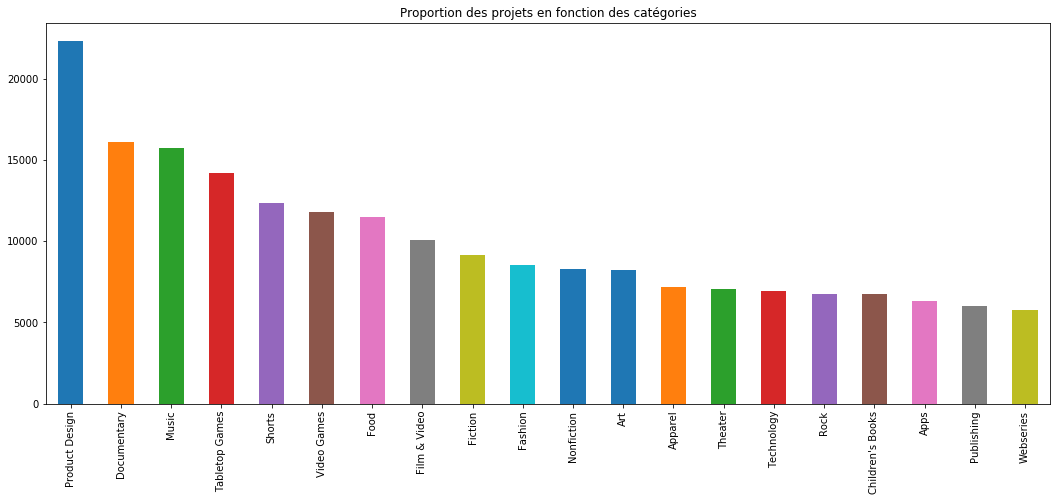

In [11]:
plt.subplots(figsize=(18,7))
df.category.value_counts().nlargest(20).plot.bar()
plt.title("Proportion des projets en fonction des catégories")

On constate que la majeure partie des projets sont dans la catégorie Product Design

Text(0.5, 1.0, 'Proportion des projets en fonction du montant investi')

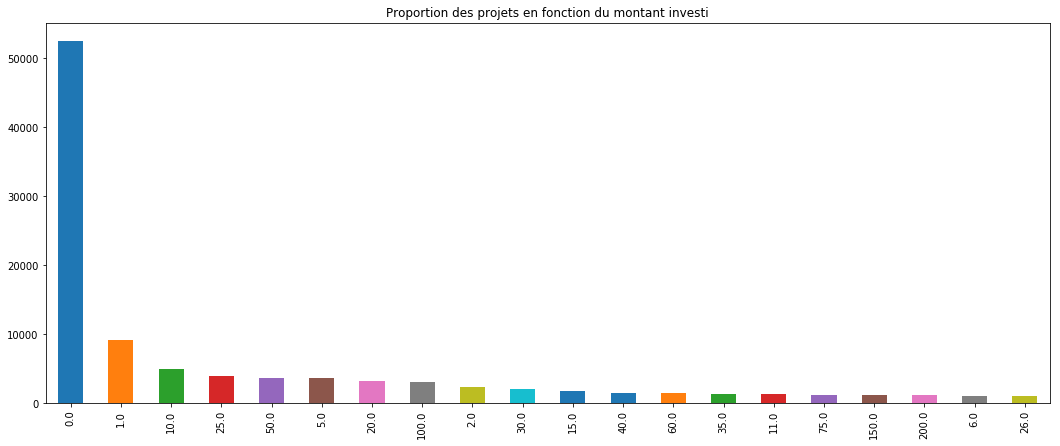

In [12]:
plt.subplots(figsize=(18,7))
df.pledged.value_counts().nlargest(20).plot.bar()
plt.title("Proportion des projets en fonction du montant investi")

Le montant qui est le plus souvent "donné" pour un projet est de 0 : En effet, les personnes ne participant à un projet donnent par défaut 0.

Text(0.5, 1.0, 'Proportion des projets en fonction du pays')

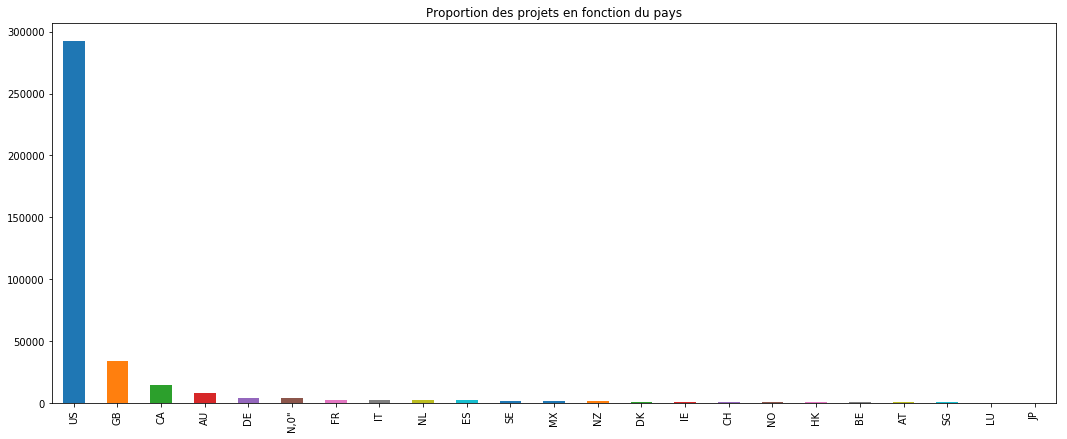

In [13]:
plt.subplots(figsize=(18,7))
df.country.value_counts().plot.bar()
plt.title("Proportion des projets en fonction du pays")

Kickstarter est une initiative Américaine, donc la majeure partie des projets sont naturellement lancés aux US.

## Analyses multivariées

### Corrélation des données numériques

Text(0.5, 1.0, 'Heatmap de corrélation')

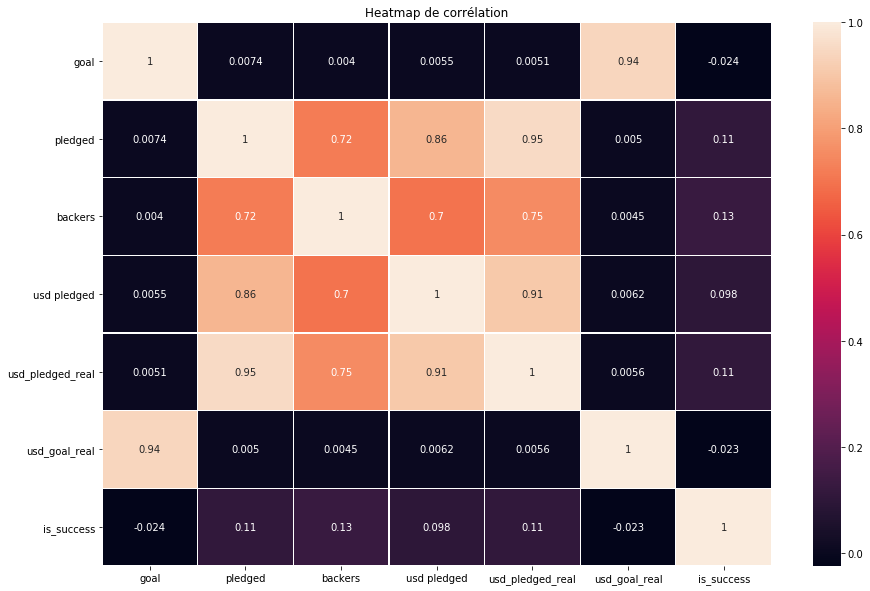

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)
plt.title("Heatmap de corrélation")

In [15]:
df.insert(column = 'is_success', value = 0, loc=14)
df.is_success[df.state == "successful"] = 1

#Insertion d'une nouvelle colonne qui permet d'associer à un projet ayant l'état successful un entier (1)
#Utile pour exprimer l'état successful avec des graphes à valeurs numériques (piechart...)

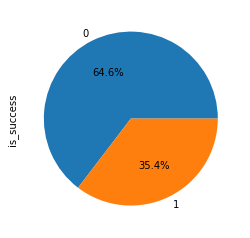

In [16]:
df.is_success.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#Représentation plus claire de la proportition générale du nombre de projets qui échouent et ceux qui réussissent.

Seul 35,4%, soit un tiers de la totalité des projets, aboutissent.

### Goal x State

Text(0.5, 1.0, "Proportion du montant du goal en fonction de l'état d'un projet")

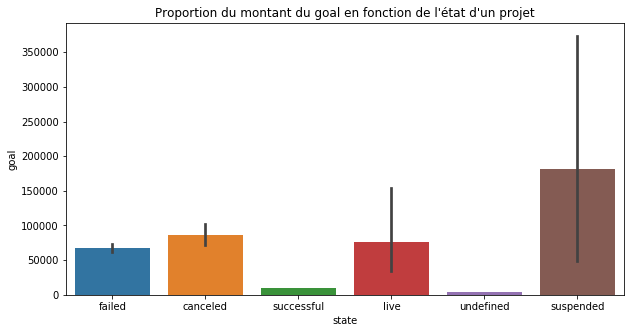

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='state',y='goal',data=df)
plt.title("Proportion du montant du goal en fonction de l'état d'un projet")

Text(0.5, 1.0, 'Répartition du nombre de projets à succès en fonction du montant du goal')

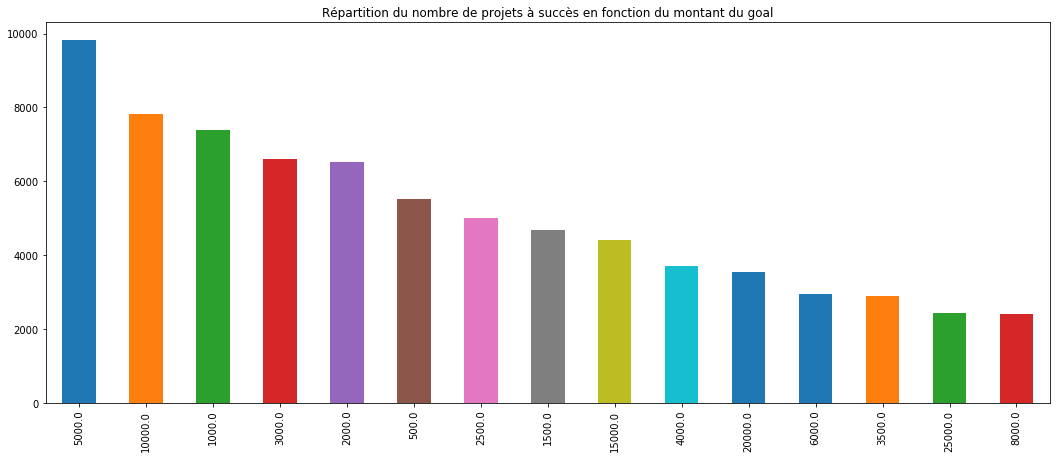

In [18]:
plt.subplots(figsize=(18,7))
df.goal[df.state == 'successful'].value_counts().head(15).plot.bar()
plt.title('Répartition du nombre de projets à succès en fonction du montant du goal')

La plupart des projets réussissants possèdent des goals d'un montant de 5000.

### Main_category x State

Text(0.5, 1.0, 'Taux de succès en fonction des principales catégories')

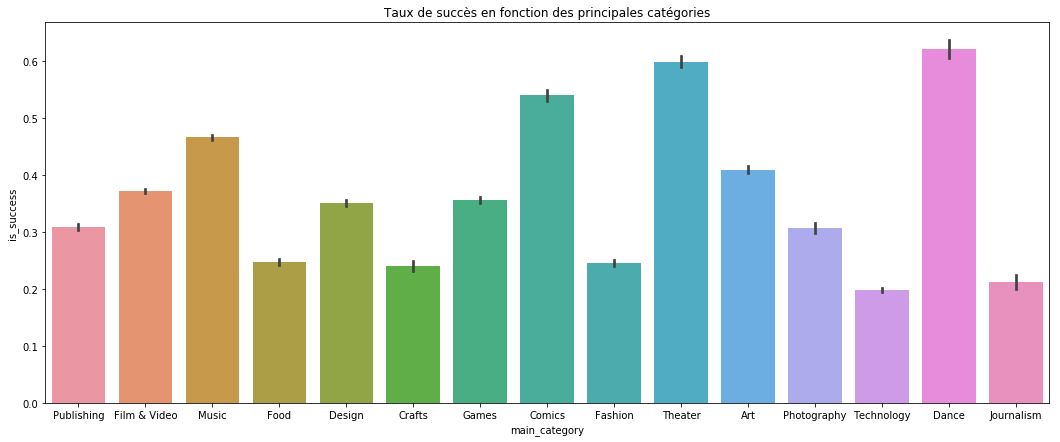

In [19]:
plt.subplots(figsize=(18,7))
sns.barplot(x = df.main_category ,y = df.is_success,data=df)
plt.title('Taux de succès en fonction des principales catégories')

Text(0.5, 1.0, 'Proportion de projets à succès ou non en fonction des catégories')

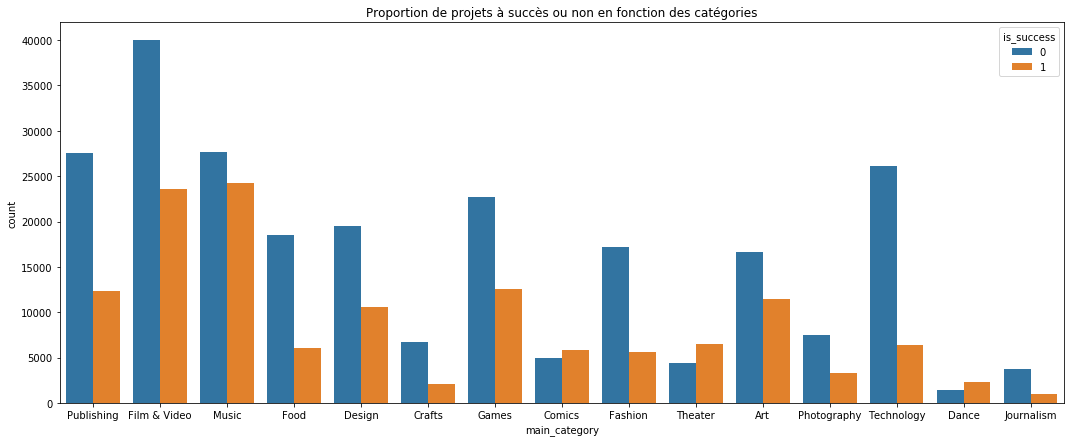

In [20]:
plt.subplots(figsize=(18,7))
sns.countplot(x="main_category", hue="is_success", data=df)
plt.title('Proportion de projets à succès ou non en fonction des catégories')

Les deux graphes ci-dessus mettent en évidence que les main_category à retenir sont Dance, Comic et Theater : Ce sont les catégories ayant à la fois un taux de succès élevé et les seuls pour lesquels la proporition de projets échoués ne dépasse pas celle de projets à succès.

### Category x State
On retient, pour cette analyse, uniquement les 3 main_category de l'analyse précédente afin d'observer quelles sous-catégories prédominentpour chaque main_category.

Text(0.5, 1.0, 'Proporition des projets à succès ou non pour la catégorie Dance')

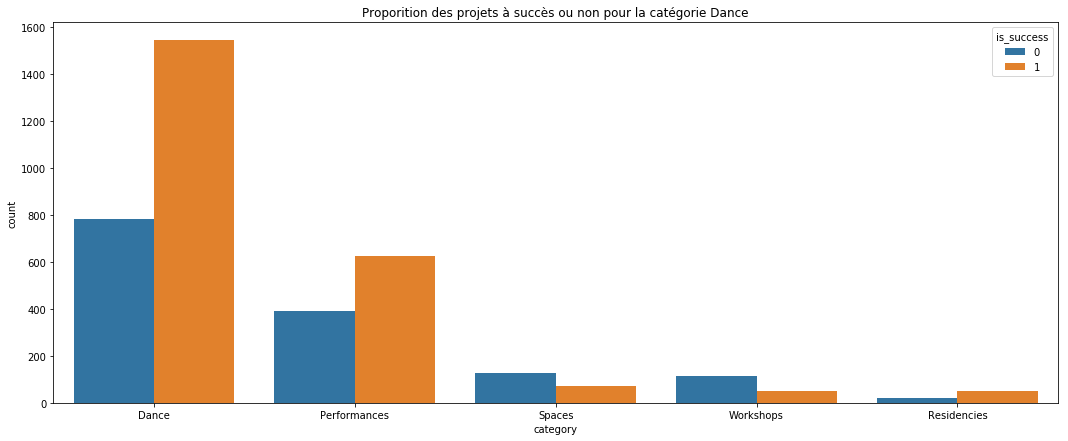

In [21]:
plt.subplots(figsize=(18,7))
sns.countplot(x="category", hue="is_success", data=df[df.main_category == 'Dance'])
plt.title('Proporition des projets à succès ou non pour la catégorie Dance')

Text(0.5, 1.0, 'Proporition des projets à succès ou non pour la catégorie Theater')

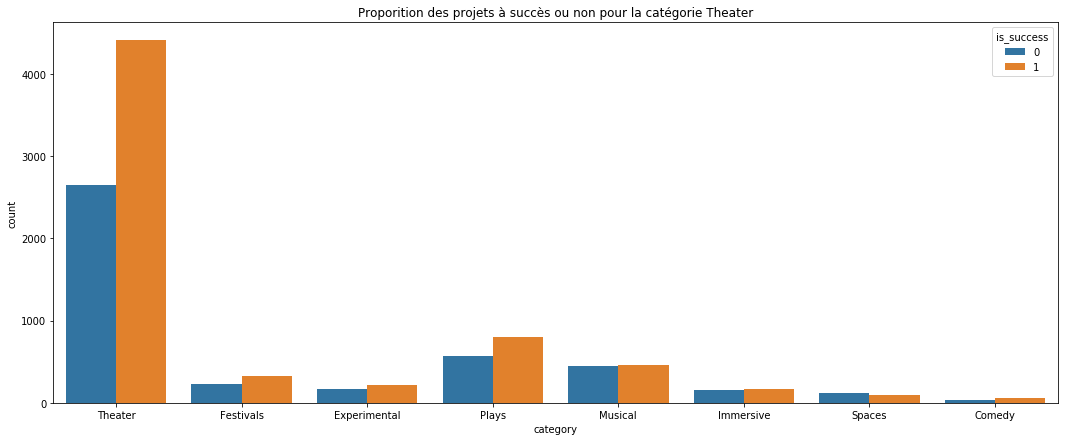

In [22]:
plt.subplots(figsize=(18,7))
sns.countplot(x="category", hue="is_success", data=df[df.main_category == 'Theater'])
plt.title('Proporition des projets à succès ou non pour la catégorie Theater')

Text(0.5, 1.0, 'Proporition des projets à succès ou non pour la catégorie Comics')

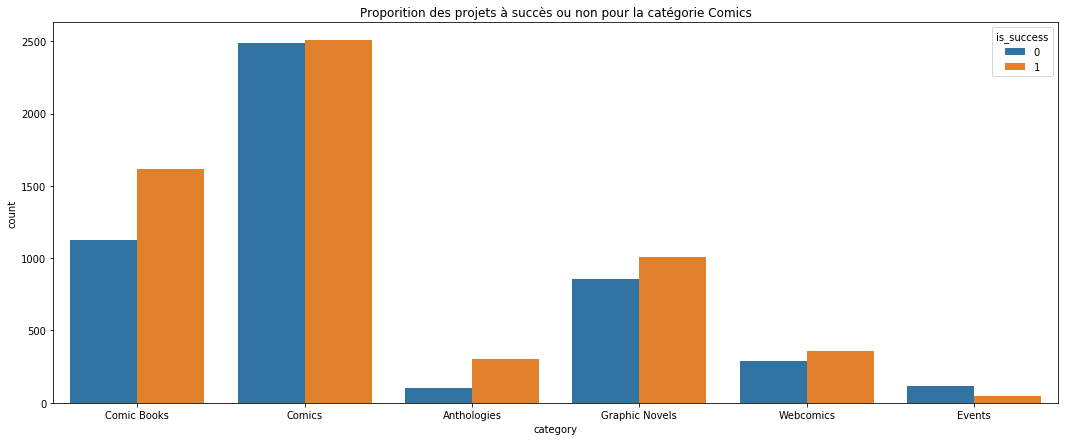

In [23]:
plt.subplots(figsize=(18,7))
sns.countplot(x="category", hue="is_success", data=df[df.main_category == 'Comics'])
plt.title('Proporition des projets à succès ou non pour la catégorie Comics')

Les 3 graphes ci-dessus ne révèle pas l'existence d'une sous-catégorie prédominante, autre que le nom de la catégorie parente : Pour la main_category Dance, la sous-catégorie ayant le plus de projets à succès est Dance et ainsi de suite pour les autres main_category

### Goal x Pledged

Text(0.5, 1.0, 'Répartition des donations en fonction du montant du goal')

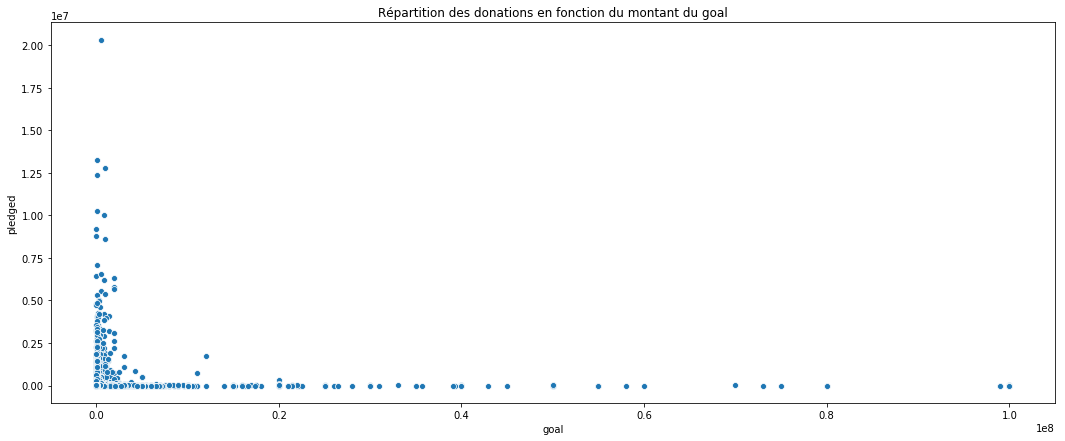

In [24]:
plt.subplots(figsize=(18,7))
sns.scatterplot(x='goal',y='pledged',data=df)
plt.title("Répartition des donations en fonction du montant du goal")

On observe ici que, plus le goal est élevé, moins les donations seront importantes. L'agglomérat en 0 montre juste, comme précédemment, qu'il y a un grand nombre de backers ne participant pas aux projets. 

### Main_category x Backers 

Text(0.5, 1.0, 'Répartition du nombre de backers par catégorie principale')

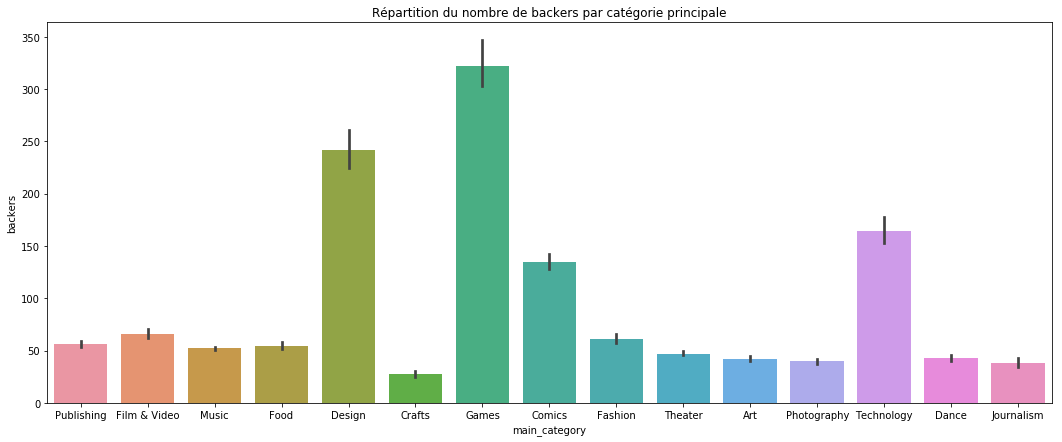

In [25]:
plt.subplots(figsize=(18,7))
sns.barplot(x = 'main_category', y = 'backers',data=df)
plt.title('Répartition du nombre de backers par catégorie principale')

### Country x is_success

Text(0.5, 1.0, 'Répartition des projets à succès par pays')

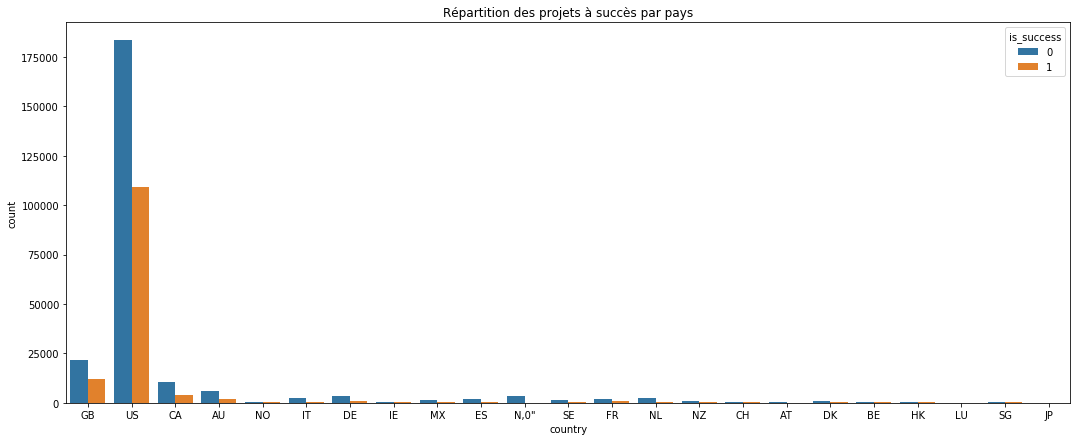

In [33]:
plt.subplots(figsize=(18,7))
sns.countplot(x="country", hue="is_success", data=df)
plt.title('Répartition des projets à succès par pays')

Ce graphe nous révèle que le choix du pays n'a pas de réel impact sur le succès ou l'échec d'un projet.

### Currency x Backers

Text(0.5, 1.0, 'Répar')

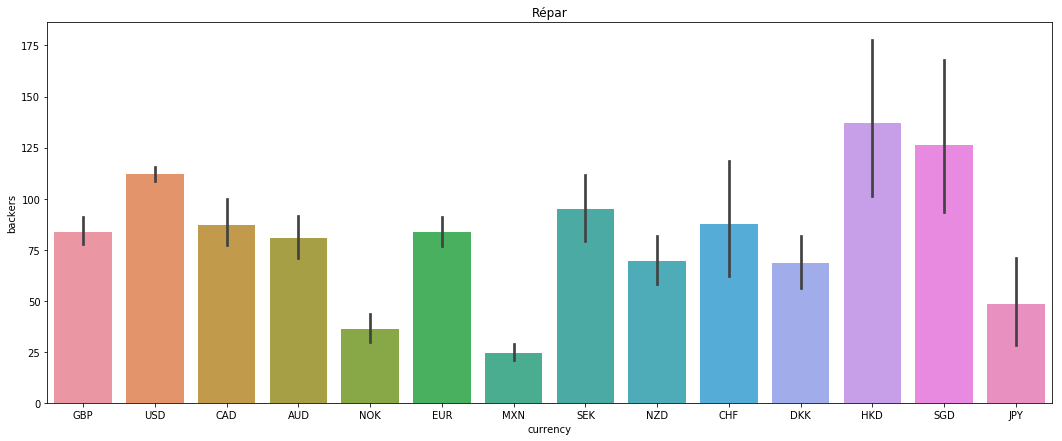

In [35]:
plt.subplots(figsize=(18,7))
sns.barplot(x='currency',y='backers',data=df)
plt.title('Répartition des devises par backers')

Les donations des backers ne sont pas majoritairement en USD, comme on aurait pu le croire puisque ce sont les US qui ont le plus de projets : En effet les devises sont reparties relativement équitablement parmis les backers.

## Conclusion

En conclusion à cet EDA, il nous est maintenant possible de prédire approximativement sous quelles conditions un nouveau projet Kickstarter est susceptible de réussire :
- Le goal fixé doit être aux alentours de 5000
- Les catégories principales qu'il est conseillé de prendre sont : Dance, Theater et Comics (peu de concurrence et bon taux de réussite
- La catégorie à privilégier : Comics (fort de taux de réussite pour un nombre conséquent de backers)
- Ne pas privilégier les catégories trop populaires car la concurrence y est forte
- Ne pas privilégier les US pour y lancer son projet, le succès n'en sera pas meilleur
- Viser les backers à l'international, et pas seulement aux US